In [43]:
#!/usr/bin/python

from IPython.display import display, HTML 
import tweepy
import csv
#import urllib3.contrib.pyopenssl
import urllib
%matplotlib inline  


#urllib3.contrib.pyopenssl.inject_into_urllib3()



#For utf-8 encoding of the tweet, getting it's sentiment through the api.
def tweet_polarity(twt):
    twt = twt.text.encode("utf-8")
    d1 = urllib.urlencode({"text": twt})
    p = urllib.urlopen("http://text-processing.com/api/sentiment/", d1)
    tp = p.read()
    return tp


#Twitter keys for authentication
consumer_key = 'kb5QYUX7jo2cMICZyNT2efNfO'
consumer_secret = '2nHLIhIxvEqCsDG9v7BFFQYbLORbuJEYT51EEu8THuaFyXZCMF'
access_key = '267704342-o2eBwoRgeOW8HaJKNQylMLEoTObot1QtawVgG6mh'
access_secret = 'OCQWt9senjxAhwXR8PIVyHptS3ZJpaapZ4jX4a99iNkI2'


#Setting up authentication
auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)



# Open/Create a file to append data
csvFile = open('result_limited.csv', 'a')
csvWriter = csv.writer(csvFile)

#Score is the guage using which we calculate the trend of sentiment of the organization.
#For simplicity, score for (negitive sentiment = -1), (positive sentiment = +1) and (neutral sentiment fetches 0)

#Would be used for real-time plotting of sentiment.
score = 0

#Only for the sake of POC. Static line graph plot of sentiment.
arr = []

# Can set the since and until dates for the stream. Disabling/not including it would get us live stream.
#q => search term
#Limiting the items to 10. Not including it would give a flowing stream.  (Limited to 10 for demo purpose)
for tweet in tweepy.Cursor(api.search,
                    q="Kayako",
                    #since="2014-02-14",
                    #until="2014-02-15",
                    lang="en").items(10):

    #Writes a row to the csv file. Used for generating a csv file for analysis.
    #csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'), tweet_polarity(tweet)])
    #print tweet.created_at, tweet.text.encode('utf-8'), tweet_polarity(tweet)
    
    #print tweet_polarity(tweet)[-10:]
    
    print tweet.text.encode('utf-8'), tweet_polarity(tweet)
    if "pos" in tweet_polarity(tweet)[-10:]:
        score += 1
        arr.append(1)
    elif "neg" in tweet_polarity(tweet)[-10:]:
        score -= 1
        arr.append(-1)
    else:
        score += 0
        arr.append(0)
    
    print("  ")
    print("  ")
csvFile.close()

print score
print arr


#Things to remember:#
#                   #
#                   #
#Text should not exceed 80k characters.

#Languages supported:
#arabic, english, danish, dutch, finnish, french, german, hungarian, italian, norwegian, portuguese, romanian
#russian, spanish, swedish



RT @Kayako: What Does Your Support Process Look Like For Your Customers? #custserv http://t.co/6s7tBcBDIz http://t.co/EXCSFkpCin {"probability": {"neg": 0.41701542260136981, "neutral": 0.36692743078127527, "pos": 0.58298457739863019}, "label": "pos"}
  
  
What Does Your Support Process Look Like For Your Customers? #custserv http://t.co/6s7tBcBDIz http://t.co/EXCSFkpCin {"probability": {"neg": 0.4392453203885528, "neutral": 0.36692743078127527, "pos": 0.5607546796114472}, "label": "pos"}
  
  
@jamie_angus brilliant. Stealing these stats! Would love to hear your thoughts on our @GOVUK #selfservice teardown: http://t.co/iQfHJwMMLU {"probability": {"neg": 0.3375354060440483, "neutral": 0.33163835590980334, "pos": 0.6624645939559517}, "label": "pos"}
  
  
RT @fabi_ator: The Help Center Health Check | Kayako Blog http://t.co/Zsx5SkFchw via @kayako {"probability": {"neg": 0.399599064713131, "neutral": 0.75187213892576421, "pos": 0.600400935286869}, "label": "neutral"}
  
  
.@Kayako @kwon

(-2, 2)

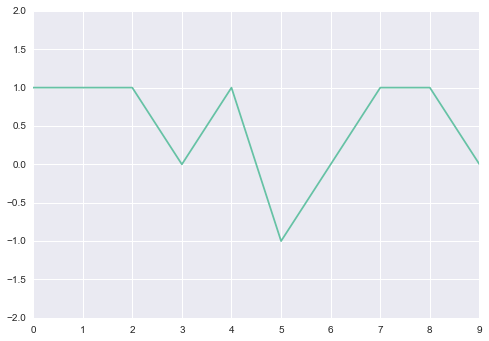

In [44]:
import seaborn as sns
sns.set(palette="Set2")

ax = sns.tsplot(arr, err_style="ci_band", ci = 95)
ax.set_ylim(-2, 2)


<b> Architecture/Flow  </b>
1. The streaming data is scraped from twitter depending on the parameters specified in the tweepy.Cursor() call.
2. Each tweet is returned along with it's sentiment; which can be displayed on the user dashboard with seperate columns for tweet data-time(tweet.created_at), for tweet's text (tweet.text) and the sentiment of the tweet.
3. Then, the tweet's date-time, tweet_id and it's score would be stored as a json objet in a db. (MongoDB).
4. The db can be called by the D3 javascript; which takes in the json objects for giving out a real-time timeseries plot.  [A demo of the plot is included in the same folder, using random data; for reference]


<b>  FAQ  </b>
1. Why aren't we using hand-made classifiers?
A. Inavailability of nice quality twitter sentiment data. So, hand-classifying data is the only option. I have already designed customizable classifiers, for using when we have considerable training data.  [when we have huge data, we can also capture very complex sentiment and sarcasm.]

2. Can't this approach capture sarcasm and irony?
A. No, and nor have anybody implemented one till now. But, can we do it?  Yes, definitely we can come very close, as I have explained before. 

3. How can we get collect data; and keep improving our algorithm?
A.  By hand classification. As nobody has time for it, we have to gamify the task.  We can keep a small button beside each setiment indicatior in the dashboard, which says "Wrongly classified?".  If yes, we ask him to select one of the three options "Pos", "Neg", "Neutral"; and would send it into our db.

<b> Reasons for the concept. </b>

Social sentiment has proved to be vital these days, for brand growth and sustaining.
Correlation between social trends and stock market movements have been noticed; which also gives strength to the above point.

So, what if we provide an option for the organization to get a step closerto understanding social reactions of it's users and the sentiment trends.

Social sentiment trends can also be a wonderful indicator of a product's performance, most importantly during the launch period.

Getting a reply from the official/employee account of the organization for a user's negative review/concern is very heart-warming and encouraging.  (gives that personal touch.)


<b> Possible extensions  </b>

1. Geographical heat maps of the sentiments can also be displayed on the dashboard. [would greatly aid marketing campaigns of the organizations.]

2. Sarcasm detection and nested sentiment detection  [involves extensive research, but if we can detect sarcasm, then there's nothing like it.]

3. Extending the scraped data by including news sources, and various other sites; to have a further and extensive results on trends.


<b>  Takeaway  </b>
One less tool for the organization for serving it's customers; and one step closer for the organizations in giving the human touch feel. 